In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

load_dotenv()
path = os.getenv("FASHIONGEN_HDF5_PATH")

In [2]:
# keys 출력
with h5py.File(path, "r") as f:
    for key in f.keys():
        print(key)

index
index_2
input_brand
input_category
input_composition
input_concat_description
input_department
input_description
input_gender
input_image
input_msrpUSD
input_name
input_pose
input_productID
input_season
input_subcategory


In [3]:
# 전체 이미지 개수
with h5py.File(path, "r") as f:
    total_size = f["input_image"].shape[0]
    print(f"Total dataset size: {total_size}")

Total dataset size: 260490


In [5]:
skip_indices = np.arange(0, 40, 4)

# 필요한 타입만 불러오기
with h5py.File(path, "r") as f:
    images = f["input_image"][skip_indices]
    desc_raw = f["input_concat_description"][skip_indices]
    cloth_types = f["input_subcategory"][skip_indices]

# bytes → str 변환
descriptions = []

for d in desc_raw:
    if isinstance(d, bytes):
        descriptions.append(d.decode("utf-8"))
    elif isinstance(d, np.ndarray):  # numpy string array일 수도 있음
        descriptions.append(d.tobytes().decode("utf-8").strip())
    else:
        descriptions.append(str(d))



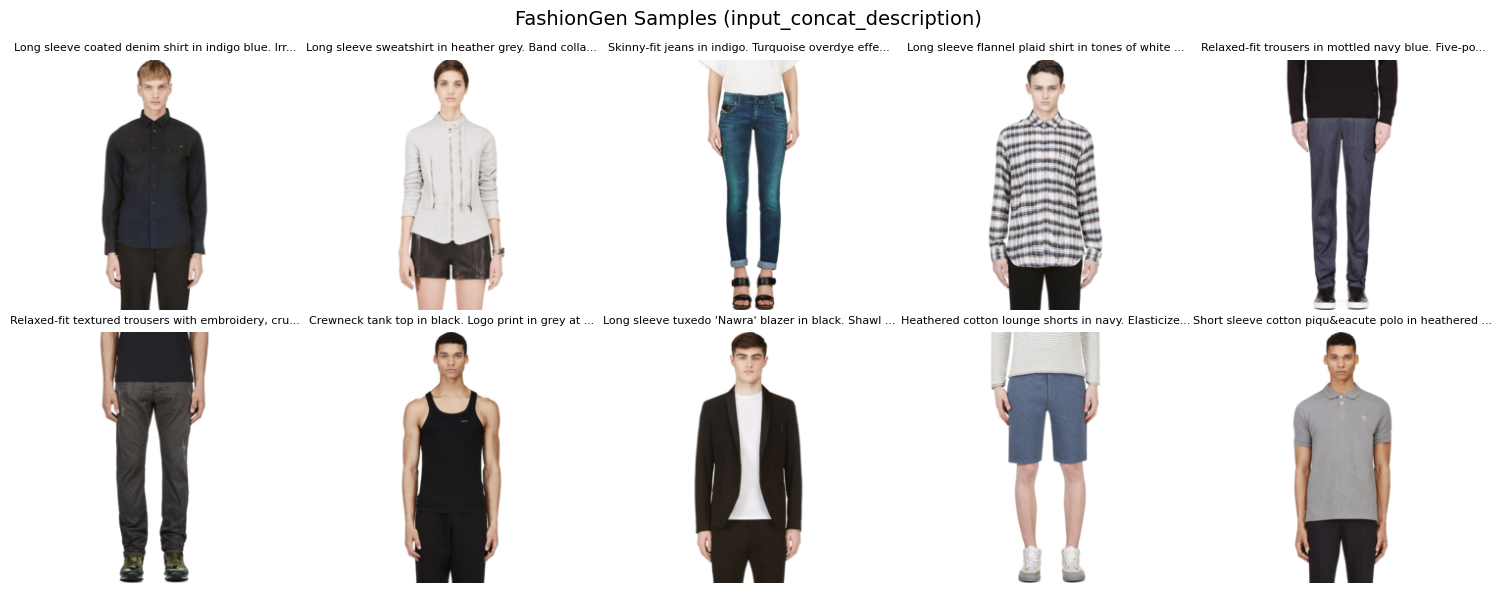

In [6]:
# 1. image-concat_description 시각화
plt.figure(figsize=(15, 6))
for i, (img, desc) in enumerate(zip(images, descriptions)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(desc[:50] + "..." if len(desc) > 50 else desc, fontsize=8)

plt.suptitle("FashionGen Samples (input_concat_description)", fontsize=14)
plt.tight_layout()
plt.show()


In [14]:
# 2. 전체 데이터셋의 subcategory 종류 확인
print("Loading all subcategories from dataset...")

unique_cloth_types = set()

with h5py.File(path, "r") as f:
    total_size = f["input_subcategory"].shape[0]
    print(f"Total samples: {total_size}")
    
    for i in range(total_size):
        ct = f["input_subcategory"][i]
        
        if isinstance(ct, bytes):
            clean_ct = ct.decode("utf-8", errors='ignore').replace('\x00', '').strip()
        elif isinstance(ct, np.ndarray):
            clean_ct = ct.tobytes().decode("utf-8", errors='ignore').replace('\x00', '').strip()
        else:
            clean_ct = str(ct).replace('\x00', '').strip()
        
        if clean_ct:  # 빈 문자열 제외
            unique_cloth_types.add(clean_ct)
        
        # 진행상황 출력
        if (i + 1) % 10000 == 0:
            print(f"Processed {i + 1}/{total_size} samples...")

print(f"\nProcessing complete!")
print(f"\nTotal unique subcategories: {len(unique_cloth_types)}")
print("\nUnique Cloth Types in Dataset:")
for cloth_type in sorted(unique_cloth_types):
    print("-", cloth_type)

Loading all subcategories from dataset...
Total samples: 260490
Processed 10000/260490 samples...
Processed 20000/260490 samples...
Processed 30000/260490 samples...
Processed 40000/260490 samples...
Processed 50000/260490 samples...
Processed 60000/260490 samples...
Processed 70000/260490 samples...
Processed 80000/260490 samples...
Processed 90000/260490 samples...
Processed 100000/260490 samples...
Processed 110000/260490 samples...
Processed 120000/260490 samples...
Processed 130000/260490 samples...
Processed 140000/260490 samples...
Processed 150000/260490 samples...
Processed 160000/260490 samples...
Processed 170000/260490 samples...
Processed 180000/260490 samples...
Processed 190000/260490 samples...
Processed 200000/260490 samples...
Processed 210000/260490 samples...
Processed 220000/260490 samples...
Processed 230000/260490 samples...
Processed 240000/260490 samples...
Processed 250000/260490 samples...
Processed 260000/260490 samples...

Processing complete!

Total unique

In [15]:
# ✅ 2.1. subcategory별 샘플 시각화 (수정 버전)
plt.figure(figsize=(15, 10))

# set → list로 변환 후 정렬 (순서 고정)
cloth_type_list = sorted(list(unique_cloth_types))

for i, cloth_type in enumerate(cloth_type_list):
    # 해당 subcategory의 첫 번째 샘플 찾기
    for j, ct in enumerate(cloth_types):
        decoded_ct = None
        if isinstance(ct, bytes):
            decoded_ct = ct.decode("utf-8").strip()
        elif isinstance(ct, np.ndarray):
            decoded_ct = ct.tobytes().decode("utf-8").strip()
        else:
            decoded_ct = str(ct).strip()
        
        # null 문자 및 불필요한 문자 제거
        decoded_ct = decoded_ct.replace('\x00', '').strip()

        if decoded_ct == cloth_type:
            # cloth_type도 동일하게 정리
            clean_cloth_type = cloth_type.replace('\x00', '').strip()
            
            plt.subplot(4, 5, i + 1)
            plt.imshow(images[j])
            plt.axis("off")
            plt.title(clean_cloth_type, fontsize=10, pad=5)
            break

plt.suptitle("FashionGen Samples by Subcategory", fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

ValueError: num must be an integer with 1 <= num <= 20, not 52

<Figure size 1500x1000 with 0 Axes>

우선은 상의만 필요하므로, Jeans, Shorts, Trousers를 제외한 나머지만 학습 데이터로 활용하자!

Loading all descriptions from dataset...
Total samples: 260490
Processed 10000/260490 samples...
Processed 20000/260490 samples...
Processed 30000/260490 samples...
Processed 40000/260490 samples...
Processed 50000/260490 samples...
Processed 60000/260490 samples...
Processed 70000/260490 samples...
Processed 80000/260490 samples...
Processed 90000/260490 samples...
Processed 100000/260490 samples...
Processed 110000/260490 samples...
Processed 120000/260490 samples...
Processed 130000/260490 samples...
Processed 140000/260490 samples...
Processed 150000/260490 samples...
Processed 160000/260490 samples...
Processed 170000/260490 samples...
Processed 180000/260490 samples...
Processed 190000/260490 samples...
Processed 200000/260490 samples...
Processed 210000/260490 samples...
Processed 220000/260490 samples...
Processed 230000/260490 samples...
Processed 240000/260490 samples...
Processed 250000/260490 samples...
Processed 260000/260490 samples...
Processing complete!

=== Descriptio

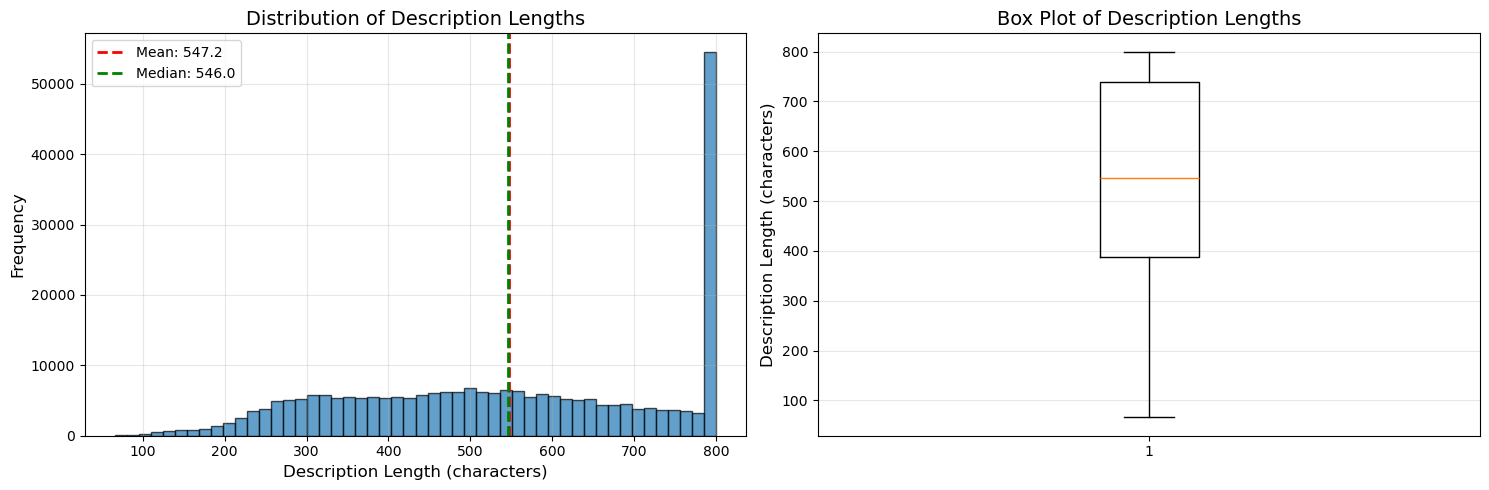

In [10]:
# ✅ 3. 전체 데이터셋의 Description 길이 분포 확인
print("Loading all descriptions from dataset...")

actual_lengths = []

with h5py.File(path, "r") as f:
    total_size = f["input_concat_description"].shape[0]
    print(f"Total samples: {total_size}")
    
    # 전체 데이터 순회하며 길이만 계산
    for i in range(total_size):
        desc = f["input_concat_description"][i]
        
        # bytes → str 변환 (에러 무시)
        if isinstance(desc, bytes):
            desc_str = desc.decode("utf-8", errors='ignore')
        elif isinstance(desc, np.ndarray):
            desc_str = desc.tobytes().decode("utf-8", errors='ignore')
        else:
            desc_str = str(desc)
        
        # 패딩 제거 후 길이 계산
        cleaned = desc_str.rstrip().rstrip('\x00')
        actual_lengths.append(len(cleaned))
        
        # 진행상황 출력
        if (i + 1) % 10000 == 0:
            print(f"Processed {i + 1}/{total_size} samples...")

print("Processing complete!")

# 통계 출력
print("\n=== Description Length Statistics ===")
print(f"Total samples: {len(actual_lengths)}")
print(f"Min length: {min(actual_lengths)}")
print(f"Max length: {max(actual_lengths)}")
print(f"Mean length: {np.mean(actual_lengths):.2f}")
print(f"Median length: {np.median(actual_lengths):.2f}")
print(f"Std deviation: {np.std(actual_lengths):.2f}")

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 히스토그램
axes[0].hist(actual_lengths, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Description Length (characters)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Description Lengths', fontsize=14)
axes[0].axvline(np.mean(actual_lengths), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {np.mean(actual_lengths):.1f}')
axes[0].axvline(np.median(actual_lengths), color='green', linestyle='--', 
                linewidth=2, label=f'Median: {np.median(actual_lengths):.1f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 박스플롯
axes[1].boxplot(actual_lengths, vert=True)
axes[1].set_ylabel('Description Length (characters)', fontsize=12)
axes[1].set_title('Box Plot of Description Lengths', fontsize=14)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [13]:
# 800자 근처 샘플 확인
print("=== Samples near 800 characters ===")

near_800 = [i for i, length in enumerate(actual_lengths) if length >= 795]
print(f"Number of samples >= 795 chars: {len(near_800)}")
print(f"Percentage: {len(near_800)/len(actual_lengths)*100:.2f}%")

# 랜덤으로 3개 샘플 선택
random_samples = np.random.choice(near_800, size=min(3, len(near_800)), replace=False)

# 몇 개 샘플 확인
with h5py.File(path, "r") as f:
    for idx in random_samples:
        desc = f["input_concat_description"][idx]
        if isinstance(desc, bytes):
            desc_str = desc.decode("utf-8", errors='ignore')
        elif isinstance(desc, np.ndarray):
            desc_str = desc.tobytes().decode("utf-8", errors='ignore')
        else:
            desc_str = str(desc)
        
        cleaned = desc_str.rstrip().rstrip('\x00')
        print(f"\n[Index {idx}, Length: {len(cleaned)}]")
        print(cleaned[-100:])  # 마지막 100자 확인

=== Samples near 800 characters ===
Number of samples >= 795 chars: 52322
Percentage: 20.09%

[Index 227037, Length: 800]
 lanyard clasp fastening. Logo plaque at face. Foldover flap with magnetic press-stud fastening. Car

[Index 179094, Length: 800]
 Button closure at front. Patch pockets at waist. Graphic embroidered in red, white, and grey throug

[Index 245944, Length: 800]
ly. Silver-tone hardware. Contrast stitching in tan. Approx. 6.5" leg opening. Short sleeve cotton j
